In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw1.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science
## Homework 1: Webscraping, Pandas, and EDA

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai, and Chris Gumb

<hr style="height:2.4pt">

In [3]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
# import pyarrow as pa
import seaborn as sns
import matplotlib.pyplot as plt
import re
import io
import os.path
import json
import time
import glob
import asyncio # optional
# import aiohttp # optional
from IPython.core.display import HTML
from IPython import display

In [5]:
# For calculating total notebook runtime
notebook_start = time.time()

In [364]:
style = '''<style>
h3, h4 {
    background-color: #7efcf5;
    border-left: 5px solid #7ec4fc;
    border-right: 5px solid #7ec4fc;
    padding: 0em;
}
h3 {
    background-color: #7efcf5;
    border-top: 5px solid #7ec4fc;
    border-left: 5px solid #7ec4fc;
    border-right: 5px solid #7ec4fc;
    padding: 0.5em;
}
p {
    padding: 0.5em;
    max-width: 34em;
    font-weight:400;
}
.md {
    max-width: 80ch;

}
.prompt {    
    background-color: lightgreen;
    border-color: #dFb5b4;
    border-left: 5px solid #f57efc;
    padding: 0.5em;
    font-weight:500;
    }
 </style>'''
HTML(style)

## Assignment Overview

You'll be working with data from screenboston.com, a website that aggregates movie screenings from various theaters in the Boston area. Your task is to collect this data, enrich it with information from Wikipedia, and then analyze and visualize the results.

## Assignment Structure

The assignment is divided into 8 main questions, each building upon the previous ones, followed by a wrap-up:

1. Fetching HTML from screenboston.com (10 pts)
2. Parsing HTML into structured data (15 pts)
3. Augmenting data with historical snapshots (15 pts)
4. Creating and manipulating a Pandas DataFrame (15 pts)
5. Initial exploratory data analysis and visualization (15 pts)
6. Finding Wikipedia pages for each screened film (7 pts)
7. Storing Wikipedia HTML in the DataFrame (3 pts)
8. Extracting and analyzing data from Wikipedia pages (15 pts)
9. Wrap-up (5 pts)

As you progress through these steps, you'll be transforming raw web data into a rich dataset ready for analysis. By the end, you'll have created a comprehensive overview of Boston's movie screening landscape, potentially uncovering interesting trends and patterns in the process. 

<div style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">

### Instructions
- To submit your notebook, follow the instructions given in on the Canvas assignment page.
- Plots should be legible and interpretable *without having to refer to the code that generated them*. They should include labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you believe the plot *means*.
- Autograding tests are mostly to help you debug. The tests are not exhaustive so simply passing all tests may not be sufficient for full credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output. Or better yet, avoid overly long output altogether.
- Feel free to add additional code or markdown cells as needed.
- Don't forget to include a written response when one is requested by a question prompt.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells (note that this can take a few minutes). 
- **You should do a "Restart Kernel and Run All Cells" before submitting to ensure (1) your notebook actually runs and (2) all output is visible**
</div>


<div class=md>
<h3>1. Getting HTML from screenboston.com</h3>

<p>Our first step is to get the HTML content from the page at screenboston.com for analysis. To avoid having to make unnecessary future requests, you should write the content to disk.</p>



<div class=prompt>
    
1. Use the `requests` library to get the html located at screenboston.com.
1. Save it in the file `data/html/screenboston.html`.

**Your code should only make an HTTP request if the file does not already exist.** 

**Hint:** the `os.path.isfile()` function can be used check if a file exists.
</div>
</div>


In [42]:
file_path = 'data/html/screenboston.html'
if not os.path.isfile(file_path):
    response = requests.get('https://www.screenboston.com/')
    file_content = response.text
    soup = BeautifulSoup(file_content, 'html.parser')
    pretty_html = soup.prettify()

    with open(file_path, 'w') as sfile:
        sfile.write(pretty_html)
    print(f"Formatted HTML has been saved to: {file_path}")
else:
    print(f"File already exists: {file_path}")


File already exists: data/html/screenboston.html


# with open(file_path, 'r') as f:
#     content = f.read()
#     s = BeautifulSoup(content)
#     print(s.find("p", class_="small", string=re.compile("Screen Boston")))

The code above successfully finds the `<p>` tag that contains the text "Screen Boston." However, the grader test does not locate the specific `<p>` tag. I encountered a similar issue when trying to find a tag with specific content in the Wikipedia part of the assignment, where using regular expressions (regex) helped.


In [366]:
grader.check("q1")

q1 results:
    q1 - 1 result:
        ✅ Test case passed

    q1 - 2 result:
        ❌ Test case failed
        Trying:
            expected_url = './data/html/screenboston.html'
        Expecting nothing
        ok
        Trying:
            with open(expected_url, 'r') as f:
                content = f.read()
                s = BeautifulSoup(content)
                assert s.select_one('p').text == 'Screen Boston', f'Content of file saved from {expected_url} should contain a <p> tag with the page name.'
        Expecting nothing
        **********************************************************************
        Line 2, in q1 1
        Failed example:
            with open(expected_url, 'r') as f:
                content = f.read()
                s = BeautifulSoup(content)
                assert s.select_one('p').text == 'Screen Boston', f'Content of file saved from {expected_url} should contain a <p> tag with the page name.'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/dordeivanovic11/micromamba/envs/cs109a/lib/python3.12/doctest.py", line 1368, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1 1[1]>", line 4, in <module>
                assert s.select_one('p').text == 'Screen Boston', f'Content of file saved from {expected_url} should contain a <p> tag with the page name.'
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError: Content of file saved from ./data/html/screenboston.html should contain a <p> tag with the page name.

    q1 - 3 result:
        ✅ Test case passed

<div class=md>
<h3>2. Parsing HTML into an Efficient Data Structure</h3>

<p>Were you to open this HTML file in an editor, you'd find it wouldn't make for light reading.
There's a lot of text in there, but we're currently only interested in a small portion of it. Thankfully, this small portion's constituant occurances appear in a mostly predictable way.
</p>

<div class='prompt'>
1. Parse the HTML page to produce an iterable of dictionaries called <code>movies</code>. Here is one possible example:
<div style="max-width:30em;padding:1em">
    
```python
{'title': 'Monty Python and the Holy Grail',
 'directors': 'Terry Jones, Terry Gilliam',
 'year': 1975,
 'genre': 'Adventure',
 'runtime': '1h 31m',
 'theater': 'Coolidge Corner Theater',
 'screen_date': '2024-08-17'
 'screen_times': '11:59 PM'}
```
</div>

2. Report the number of dictionaries in your iterable.
3. Display an example dictionary.
</div>

<p>
<b>One possible approach:</b> leveraging the structure of the page, use BeautifulSoup to divide it into disjoint peices of the HTML tree, each containing the set of information outlined above for each title's screening date at a given theater. Each peice is processed by a helper function(s) which extracts the desired fields and assemples them into a dictionary. These dictionaries are then accumulated in some iterable such as a list.
</p>

**Hints:**
- Your browser's 'inspect' tool is very useful for exploring a page's structure.
- To maintain a uniform set of keys across all movie dictionaries, use the plural 'directors' even for movies which attribute only a single director. 
</div>
</div>

In [43]:
def create_dict(button):
    data = {
        "title": None,
        "directors": None,
        "year": None,
        "genre": None,
        "runtime": None,
        "theater": None,
        "screen_times": None,
        "screen_date": None,
    }

    p_tags = button.find_all('p')
    
    # pointer functionality
    count = 0

    while 'text-[12px]' in p_tags[count].get('class', []) or 'text-primary' in p_tags[count].get('class', []):
        count += 1

    data["title"] = p_tags[count].get_text(strip=True)
    count += 1

    # skip over the notices (35mm, 75mm, etc.)
    while count < len(p_tags) and 'text-primary' in p_tags[count].get('class', []):
        count += 1

    data["directors"] = p_tags[count].get_text(strip=True)
    count += 1

    # extract year, genre, and runtime by checking for the pattern year, genre, runtime
    year_genre_runtime = p_tags[count].get_text(strip=True)
    if ',' in year_genre_runtime and any(char.isdigit() for char in year_genre_runtime):
        year_genre_runtime = year_genre_runtime.split(", ")
        if len(year_genre_runtime) == 3:
            try:
                data["year"] = int(year_genre_runtime[0])
            except ValueError:
                data["year"] = None
            data["genre"] = year_genre_runtime[1]
            data["runtime"] = year_genre_runtime[2]
        else:
            data["year"], data["genre"], data["runtime"] = None, None, None
        count += 1

    # extract theater
    if count < len(p_tags):
        data["theater"] = p_tags[count].get_text(strip=True)
        count += 1

    # collect all screening times
    screen_times = []
    while count < len(p_tags):
        screen_times.append(p_tags[count].get_text(strip=True))
        count += 1
    data["screen_times"] = ". ".join(screen_times) if screen_times else None

    return data


def is_valid_date(date_string):
    return re.match(r'\d{4}-\d{2}-\d{2}', date_string) is not None

def extract_movies(soup):
    all_movie_data = []
    
    divs = soup.find_all('div')
    
    for div in divs:
        # each div starts with id that is a date
        if 'id' in div.attrs and is_valid_date(div['id']):
            date = div['id']
            buttons = div.find_all('button')
            
            for button in buttons:
                movie_data = create_dict(button)
                movie_data["screen_date"] = date
                all_movie_data.append(movie_data)
    
    return all_movie_data

file = open("data/html/screenboston.html", "r")
soup = BeautifulSoup(file, 'html.parser')
file.close()

movies = extract_movies(soup)


movies[23:34]


[{'title': 'Moving',
  'directors': 'Shinji SÅ\x8dmai',
  'year': 1993,
  'genre': 'Drama',
  'runtime': '2h 4m',
  'theater': 'Harvard Film Archive',
  'screen_times': '9:00 PM',
  'screen_date': '2024-09-20'},
 {'title': 'Troll 2',
  'directors': 'Claudio Fragasso',
  'year': 1990,
  'genre': 'Horror',
  'runtime': '1h 35m',
  'theater': 'Coolidge Corner Theatre',
  'screen_times': '11:59 PM',
  'screen_date': '2024-09-20'},
 {'title': 'Drive My Car',
  'directors': 'RyÅ«suke Hamaguchi',
  'year': 2021,
  'genre': 'Drama',
  'runtime': '2h 59m',
  'theater': 'Harvard Film Archive',
  'screen_times': '6:00 PM',
  'screen_date': '2024-09-21'},
 {'title': 'Naked Acts',
  'directors': 'Bridgett M. Davis',
  'year': 1996,
  'genre': 'Comedy',
  'runtime': '1h 27m',
  'theater': 'The Brattle',
  'screen_times': '7:00 PM',
  'screen_date': '2024-09-21'},
 {'title': 'Inception',
  'directors': 'Christopher Nolan',
  'year': 2010,
  'genre': 'Action',
  'runtime': '2h 28m',
  'theater': 'Cool

In [44]:
grader.check("q2")

q2 results: All test cases passed!

<div class=md>
    <h3>3. Adding Historical Data: Snapshots from the Internet Archive's Wayback Machine</h3>
<p>
The screenboston.com page only shows screenings scheduled from the current day until about 2-4 weeks into the future.
Using the <a href="http://web.archive.org/">Wayback Machine</a>, we can augment our dataset with past snapshots of the page  
</p>

<p>
Rather than clicking around to download each snapshot manually, we should again acquire our pages programmatically using <code>requests</code>. The Internet Archive offers an <a href='https://archive.org/help/wayback_api.php'>API</a> where you can specify a URL and timestamp and receive a JSON object which contains a new URL to a snapshot of the desired page nearest to the provided timestamp. You can then use <code>requests</code> again to acquire the HTML of this snapshot.
</p>
    
<div class=prompt>

1. Acquire enough snapshots to cover all days from Jan through September 2024 for which there exists data. 
For simplicity we'll assume that any well-formed screenboston.com page will cover at least through the end of that month and that a day's schedule won't change once displayed.
2. Write each snapshot's HTML content to disk in the `/data/html` directory using filenames of the form `'snapshot_YYYYMMDD.html'`. Your code should only make requests if no local snapshot files already exist.
3. Using your parsing function from the previous section, add movie dictionaries extracted from all the snapshots to your list, `movies`. Save this list of dictionaries as 'data/movies.json'. You should only perform the parsing if the JSON file does not already exist. Don't worry about any duplicate movie screenings in your list at this point.

</div>

**Hints:**
- When retrieving JSON content with <code>requests</code>, us the `json()` method rather than the `text` attribute to extract the content from the returned request object into a nested dictionary rather than a string.
- APIs often take parameters as key-value pairs occuring after a '?' character in the URL. For example 'http://archive.org/wayback/available?url=example.com&timestamp=20060101' includes a 'url' and a 'timestamp' parameter. When using <code>requests.get()</code> you can exclude these parameters from the URL itself and instead pass them as a dictionary to an argument called 'params'.
- Use <code>json.dump()</code> and <code>json.load()</code> from the imported <code>json</code> module for writing and reading JSON content.

In [24]:
def date_generator(start_date, end_date):
    dates = []
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)
    
    while start <= end:
        dates.append(start.strftime('%Y%m%d'))  
        start += pd.DateOffset(days=1)

    return dates

def capture_snapshot(dates, delay=2):
    redo = []
    
    for date in dates:
        snapshot_url = "https://archive.org/wayback/available"
        params = {'url': 'screenboston.com', 'timestamp': date}
        
        try:
            snapshot = requests.get(snapshot_url, params=params).json()
            
            if "closest" in snapshot["archived_snapshots"]:
                file_path = f"data/html/snapshot_{date}.html"
                
                if os.path.isfile(file_path):
                    print(f"Snapshot already exists for {date}")
                    continue
                
                url = snapshot['archived_snapshots']['closest']['url']
                response = requests.get(url)
                file_content = response.text
                
                with open(file_path, 'w') as sfile:
                    sfile.write(file_content)

                print(f"Snapshot saved for {date}")
                
            else:
                print(f"No snapshot available for {date}")
                

        except ConnectionError as e:
            print(f"Connection failed for {date}: {e}. Retrying in {delay} seconds...")
            redo.append(date)
            time.sleep(delay)  
            
        except Exception as e:
            print(f"An error occurred for {date}: {e}")
    
    if redo:
        print(f"Dates to retry: {redo}")
    
    return redo

def extract_movies_from_snapshot(date):
    file_path = f"data/html/snapshot_{date}.html"
    if not os.path.isfile(file_path):
        return []

    with open(file_path, "r") as file:
        soup = BeautifulSoup(file.read(), 'html.parser')
    
    return extract_movies(soup)

def main():
    start_date = '2024-08-10'
    end_date = '2024-09-01'

    dates = date_generator(start_date, end_date)

    # if there is a connection error, we would wont to redo the ones that were skipped
    redo = capture_snapshot(dates)
    # while redo != []:
    # capture_snapshot(redo)

    movies_file_path = 'data/movies.json'
    if os.path.isfile(movies_file_path):
        with open(movies_file_path, 'r') as f:
            movies = json.load(f)
    else:
        movies = []

    for date in dates:
        movies_from_snapshot = extract_movies_from_snapshot(date)
        if movies_from_snapshot:
            movies.extend(movies_from_snapshot)

    with open(movies_file_path, 'w') as f:
        json.dump(movies, f, indent=4)


def delete_snapshots(directory="data/html"):
    for filename in os.listdir(directory):
        if filename.startswith("snapshot_") and filename.endswith(".html"):
            file_path = os.path.join(directory, filename)
            try:
                os.remove(file_path)
                print(f"Deleted: {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")

def delete_movies_file(file_path="data/movies.json"):
    if os.path.isfile(file_path):
        try:
            os.remove(file_path)
            print(f"Deleted: {file_path}")
        except Exception as e:
            print(f"Error deleting {file_path}: {e}")


if __name__ == "__main__":
    # delete_movies_file()
    # delete_snapshots()
    main()



No snapshot available for 20240810
No snapshot available for 20240811
No snapshot available for 20240812
No snapshot available for 20240813
Snapshot saved for 20240814
Snapshot saved for 20240815
Snapshot saved for 20240816
Snapshot saved for 20240817
Snapshot saved for 20240818
Snapshot saved for 20240819
No snapshot available for 20240820
Snapshot already exists for 20240821
No snapshot available for 20240822
No snapshot available for 20240823
Snapshot saved for 20240824
Snapshot saved for 20240825
Snapshot already exists for 20240826
Snapshot saved for 20240827
Snapshot already exists for 20240828
Snapshot already exists for 20240829
No snapshot available for 20240830
No snapshot available for 20240831
No snapshot available for 20240901


In [25]:
# Display info about snapshots and results of parsing
print(f"Snapshots:")
print([f.split('/')[-1] for f in glob.glob('data/html/snapshot_*')])
print(f"Found {len(movies)} movie entries across all HTML files.")

Snapshots:
['snapshot_20240103.html', 'snapshot_20240416.html', 'snapshot_20240504.html', 'snapshot_20240512.html', 'snapshot_20240816.html', 'snapshot_20240115.html', 'snapshot_20240617.html', 'snapshot_20240210.html', 'snapshot_20240705.html', 'snapshot_20240713.html', 'snapshot_20240601.html', 'snapshot_20240314.html', 'snapshot_20240226.html', 'snapshot_20240508.html', 'snapshot_20240621.html', 'snapshot_20240119.html', 'snapshot_20240420.html', 'snapshot_20240709.html', 'snapshot_20240123.html', 'snapshot_20240820.html', 'snapshot_20240524.html', 'snapshot_20240318.html', 'snapshot_20240319.html', 'snapshot_20240122.html', 'snapshot_20240821.html', 'snapshot_20240708.html', 'snapshot_20240118.html', 'snapshot_20240620.html', 'snapshot_20240227.html', 'snapshot_20240529.html', 'snapshot_20240315.html', 'snapshot_20240207.html', 'snapshot_20240712.html', 'snapshot_20240704.html', 'snapshot_20240616.html', 'snapshot_20240303.html', 'snapshot_20240817.html', 'snapshot_20240114.html', 

In [26]:
grader.check("q3")

q3 results: All test cases passed!

<div class=md>
    
<h3>4. DataFrame Creation & Manipulation</h3>

Your variable `movies` is a list of dictionaries which you can use to create a Pandas DataFrame. Have our data in a DataFrame will make it much easier to analyze and manipulate.

<div class=prompt>
    
1. Use `movies` to create a DataFrame and call it `df`
2. Drop any **duplicate rows** and report the number of remaining rows. Here we consider duplicates to be rows in which *all* values match. The same movie screening on different days, even at the same theater, will not be considered a duplicate.
3. Check for **nans**. If you find any nans you should report the number of nans in each column and display the rows that contain at least one nan. If there are no nans then you should display output to confirm this fact.
4. Convert the **'screen_date'** to a Pandas `datetime` dtype and **'runtime'** to a Pandas `timedelta` dtype.
5. Sort your `df` by ascending 'screen_date'
</div>

Your result should look something like:

| title                            | directors       | year | genre  | runtime         | theater                   | screen_date | screen_times         |
|-----------------------------------|-----------------|------|--------|-----------------|---------------------------|-------------|----------------------|
| Ghost Dog: The Way of the Samurai | Jim Jarmusch    | 1999 | Crime  | 0 days 01:56:00 | The Brattle               | 2024-05-24  | 4:00 PM, 9:00 PM     |
| Stray Dog                        | Akira Kurosawa  | 1949 | Crime  | 0 days 02:02:00 | The Brattle               | 2024-05-24  | 6:30 PM              |
| Big Trouble in Little China       | John Carpenter  | 1986 | Comedy | 0 days 01:40:00 | Coolidge Corner Theatre    | 2024-05-24  | 11:59 PM             |
| Young Frankenstein               | Mel Brooks      | 1974 | Comedy | 0 days 01:46:00 | The Brattle               | 2024-05-25  | 12:00 PM             |
| Poetry                           | Lee Chang-dong  | 2010 | Drama  | 0 days 02:19:00 | Museum of Fine Arts        | 2024-05-25  | 2:30 PM              |

**Hints:**
- You can use the `dt.date` attribute on a datetime column to extract just the day (and ignore the time)
- You may need to to do some string parsing on 'runtime' before coverting it to a `timedelta`
- Pandas now supports [PyArrow](https://arrow.apache.org/docs/python/index.html) as a backend alternative to Numpy. This gives access to new datatypes including native strings (as opposed to the catch-all 'object'), ints that support NaN values, and others. Using these datatypes can often speed up computations so you may choose to experiment with converting some or all of your columns to these new datatypes. You can read more [here](https://pandas.pydata.org/docs/user_guide/pyarrow.html).
</div>

In [58]:
movies_json = "data/movies.json"
with open(movies_json, "r") as file:
    movies = json.load(file)

df = pd.DataFrame(movies, index=None)
df.head()

# drop columns with notice as I saved them previously even though they are not needed
while 'notice' in df.columns:
    df = df.drop(columns=['notice'])

# drop duplicated rows everything matches
df = df.drop_duplicates()

# print(len(df))
# print(df["runtime"]) #1h 56m example

nans_in_columns = df.isnull().sum()
print("Number of NaNs in each column:\n", nans_in_columns)
rows_with_nans = df[df.isnull().any(axis=1)]
if rows_with_nans.empty:
    print("No rows with NaNs found.")
else:
    print("Rows with NaNs:\n", rows_with_nans)

df['screen_date'] = pd.to_datetime(df['screen_date'])
df['runtime'] = pd.to_timedelta(df['runtime'])

df = df.sort_values(by='screen_date')
df.head()

# notice is in the output column as I previously also saved that information,
# but realized it was not needed in the assignment



Number of NaNs in each column:
 title           0
directors       0
year            0
genre           0
runtime         0
theater         0
screen_times    0
screen_date     0
dtype: int64
No rows with NaNs found.


,title,directors,year,genre,runtime,theater,screen_times,screen_date
0,Ghost Dog: The Way of the Samurai,Jim Jarmusch,1999,Crime,0 days 01:56:00,The Brattle,4:00 PM. 9:00 PM,2024-05-24
1,Stray Dog,Akira Kurosawa,1949,Crime,0 days 02:02:00,The Brattle,6:30 PM,2024-05-24
2,Big Trouble in Little China,John Carpenter,1986,Comedy,0 days 01:40:00,Coolidge Corner Theatre,11:59 PM,2024-05-24
9,Black Rain,Ridley Scott,1989,Drama,0 days 02:05:00,Coolidge Corner Theatre,11:59 PM,2024-05-25
8,Stop Making Sense,Jonathan Demme,1984,Documentary,0 days 01:28:00,The Brattle,10:00 PM,2024-05-25


In [59]:
grader.check("q4")

q4 results: All test cases passed!

<div class=md>
    
<h3>5. Initial Exploratory Data Analysis (EDA)</h3>

Using your DataFrame, perform the following exploratory data analysis tasks. Note that we'll use the term "screening" to refer to rows in the DataFrame example provided above. For each visualization component of this question you should interpret the results and draw conclusions.

<div class=prompt>

1. **Longest Films**:
   Display the rows corresponding to the top 5 longest reported runtimes in descending order.

2. **Screening Counts**:
   Create two plots as side-by-side subplots with a shared y-axis range:\
   a. Number of screenings by theater\
   b. Number of screenings by genre\

3. **Movie Year Analysis**:
   Create two separate plots:\
   a. Distribution of 'year' for all movies\
   b. Distribution of 'year' grouped by theater

4. **Custom Analysis**:
   Ask two questions of your choice regarding the screening data and use plots to attempt to find some answers. For each question:\
   a. Clearly state your question\
   b. Explain your approach to answering the question\
   c. Create an appropriate visualization\
   
   At least one of these new plots must be a different type from those used in parts 2 and 3.

Example questions you might consider:
- Is there a relationship between a movie's age (current year - release year) and the number of screenings it receives?
- Do certain genres tend to have longer runtimes?
- Are there patterns in screening times for different theaters or genres?
- How does the distribution of genres vary across different theaters?


</div>
</div>

In [60]:
df.sort_values(by='runtime', inplace=True)
df[len(df) - 5:].sort_values(by='runtime', ascending=False)

,title,directors,year,genre,runtime,theater,screen_times,screen_date
8052,La Roue,Abel Gance,1923,Drama,0 days 06:58:00,The Brattle,12:00 PM,2024-09-28
7094,The Phantom Creeps,"Ford Beebe, Saul A. Goodkind",1939,SciFi,0 days 04:25:00,Somerville Theatre,12:30 PM,2024-08-25
4386,Menus-Plaisirs - Les Troisgros,Frederick Wiseman,2023,Documentary,0 days 04:00:00,Museum of Fine Arts,12:30 PM,2024-08-03
7600,Lawrence of Arabia,David Lean,1962,Adventure,0 days 03:48:00,Coolidge Corner Theatre,2:00 PM,2024-09-15
4395,"Jeanne Dielman, 23, quai du Commerce, 1080 Bru...",Chantal Akerman,1976,Drama,0 days 03:22:00,The Brattle,6:30 PM,2024-08-04


The results are conclusive and since we have a valid sorting of the list of screenings we are guaranteed to have a correct answer for the top 5 longest movies.

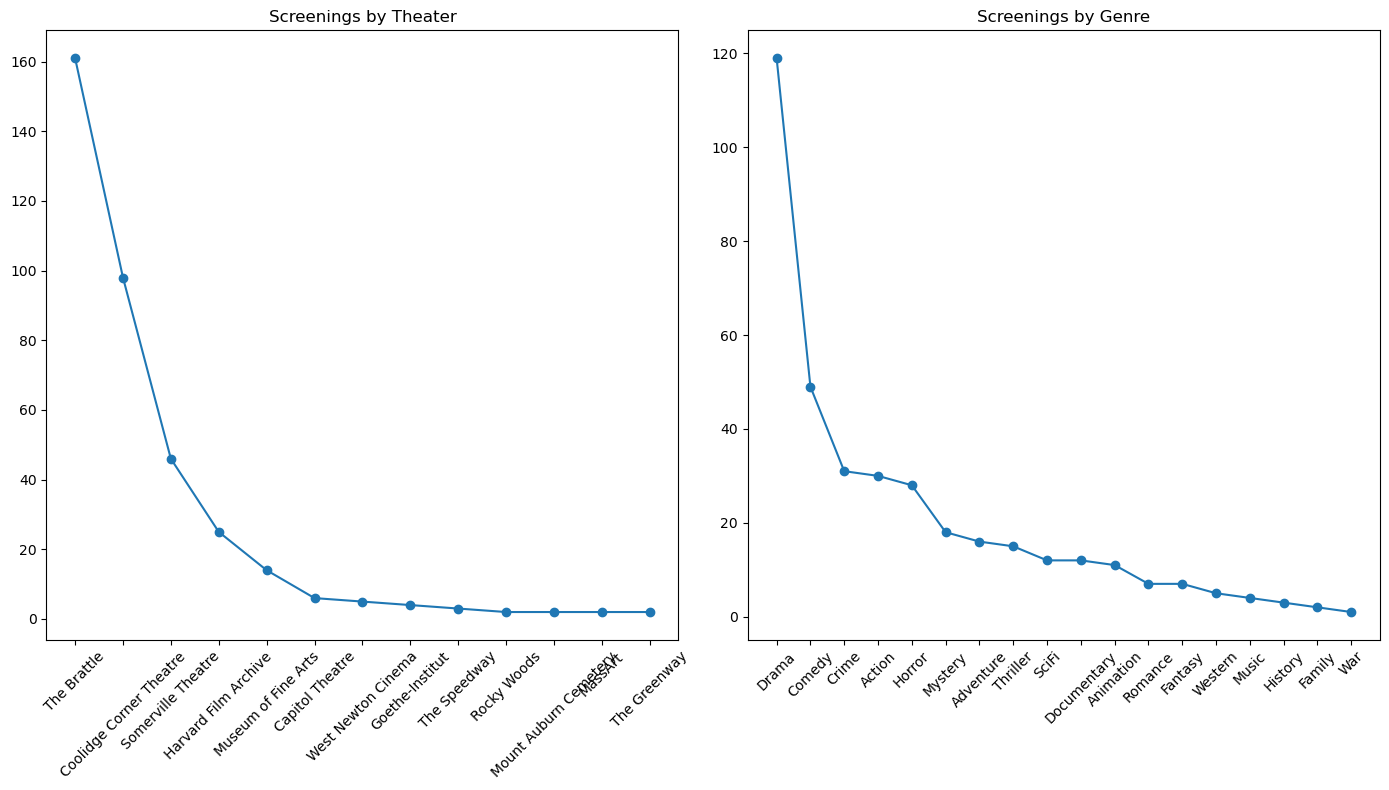

In [62]:
# 2. Screenings by theater & screenings by genre
plt.figure(figsize=(14, 8))  
plt.subplot(1, 2, 1)
plt.plot(df['theater'].value_counts(), marker='o')
plt.title('Screenings by Theater')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(df['genre'].value_counts(), marker='o')
plt.title('Screenings by Genre')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


We can observe that there are several theaters that frequently screen movies like The Bratle,  Coolidge Center, Somerville Theeater, Harvard Film Archive, whereas others show less then 10 movies given the data from 1st September to 16th October. Similarly, there is a trend in the genre of movies where Drama, Comedy and Crime are the most represented amongs the movies there were screened.



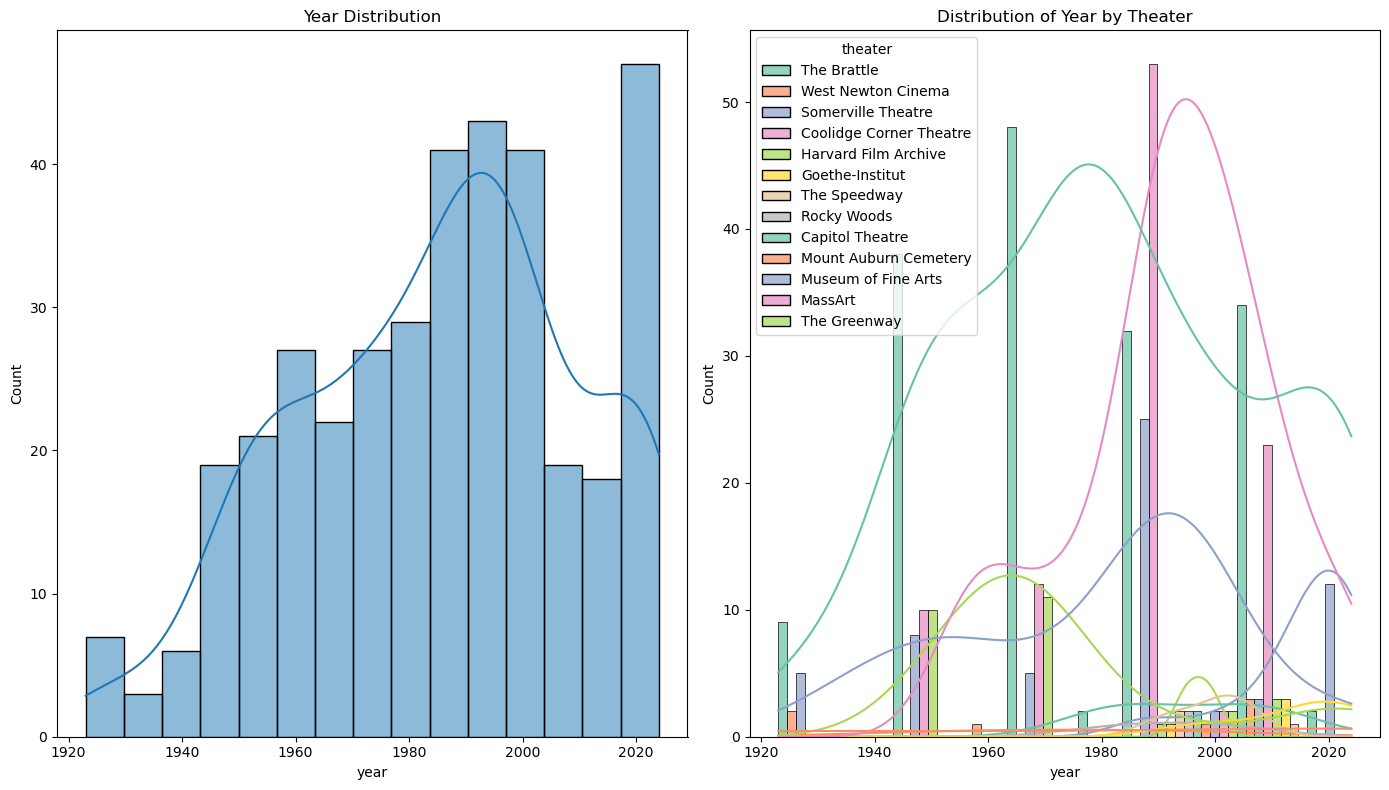

In [63]:
# 3. Year distribution & distribution of year by theater
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.histplot(df['year'], bins=15, kde=True)
plt.title('Year Distribution')
plt.subplot(1, 2, 2)
sns.histplot(
    data=df, 
    x='year', 
    hue='theater', 
    bins=5, 
    kde=True, 
    multiple="dodge",  
    alpha=0.7, 
    edgecolor="black", 
    palette="Set2")
plt.title('Distribution of Year by Theater')

plt.tight_layout()
plt.show()



Both graphs show similar trends. The first graph highlights that a large number of movies screened were produced between 1985 and 1995, with a significant peak in the last four years. The second graph reveals that theaters tend to focus on specific periods, indicated by local maxima.

Harvard Film Archive primarily features films from the 1960s.
The Brattle showcases movies from various years, with a focus on the 1980s.
Coolidge Corner Theatre mainly screens movies from the 1990s but also includes films from the 1940s to today.

Each theater has its own distribution pattern, reflecting their emphasis on different cinematic eras.

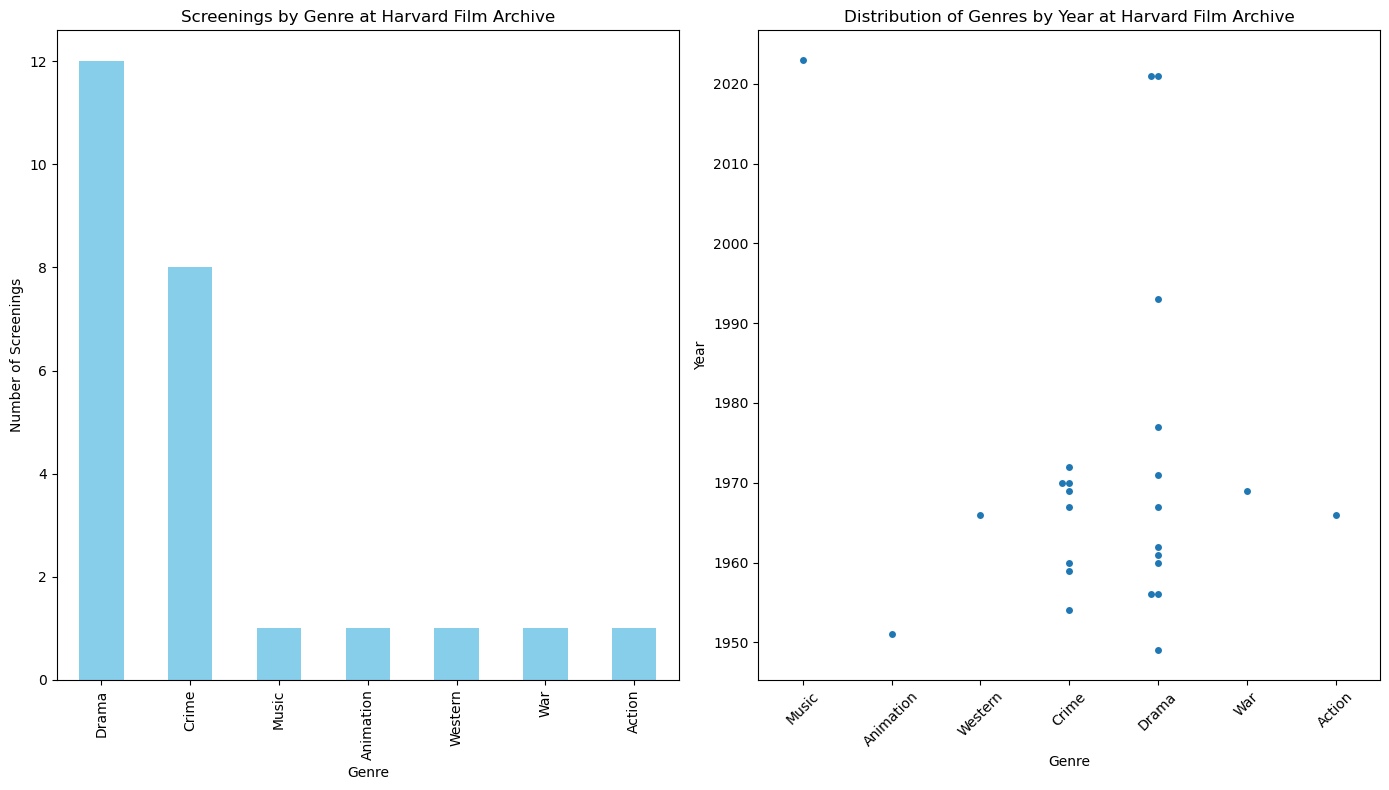

In [309]:
#Which genres are most frequently featured in movie screenings at the Harvard Film Archive, 
# and how does the distribution of these genres vary across different years?

harvard_df = df[df['theater'] == 'Harvard Film Archive']


plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
harvard_genres = harvard_df['genre'].value_counts()
harvard_genres.plot(kind='bar', color='skyblue')
plt.title('Screenings by Genre at Harvard Film Archive')
plt.xlabel('Genre')
plt.ylabel('Number of Screenings')

plt.subplot(1, 2, 2)
sns.swarmplot(x='genre', y='year', data=harvard_df)
plt.title('Distribution of Genres by Year at Harvard Film Archive')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()



The Harvard Film Archive predominantly screens Drama and Crime films, with Drama being the most frequently featured. Other genres like Music, Animation, Western, War, and Action are screened far less often. The distribution over time shows that Drama and Crime films are screened across various years mostly before 70s, with notable clusters in more recent periods. In contrast, the less common genres appear sporadically over different decades, indicating a more selective focus on these categories.


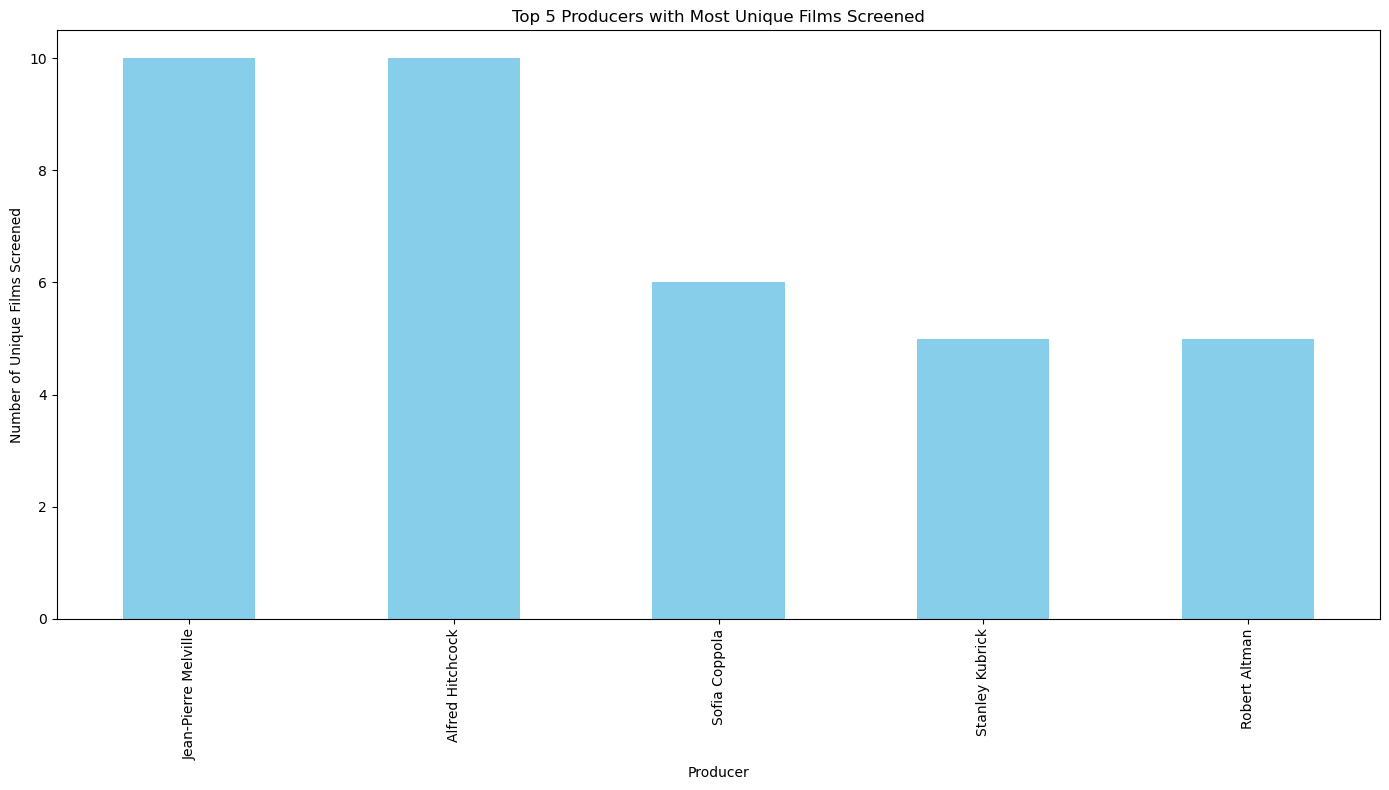

In [67]:
# what are the producers with most films screened in the top 5 theaters?
plt.figure(figsize=(14, 8))
top_producers = df.groupby('directors')['title'].nunique().sort_values(ascending=False).head(5)
top_producers.plot(kind='bar', color='skyblue')
plt.title('Top 5 Producers with Most Unique Films Screened')
plt.xlabel('Producer')
plt.ylabel('Number of Unique Films Screened')

plt.tight_layout()
plt.show()



The chart shows that Jean-Pierre Melville and Alfred Hitchcock are the top producers, each with 10 unique films screened. Sofia Coppola follows with 7 films, while Stanley Kubrick and Robert Altman both have 6 unique films. This indicates that these directors have significant representation in screenings, with a particular emphasis on Melville and Hitchcock's work.

<div class=md>
    <h3>6. Get a film's Wikipedia page identifier</h3>

The screenboston page has relatively little information about each film.  But we can use some of the what we *do* know about each film to query Wikipedia for additional data.
<div class=prompt>
    
  Find a unique identifier for the Wikipedia page for each film and store it in a new 'wiki_id' column. This could be the URL itself or a unique page ID that will allow you to recover the URL. Display the head of your updated DataFrame and describe your approach. You should strive to find page identifiers for as many films as possible, but don't worry if you can't find them all. Shoot for at least 50%.
</div>

**Hints:**
- One way to do this is to construct a query string to that can be appended to wikipeda's search URL:<br>
<code>'https://en.wikipedia.org/w/index.php?search='`</code><br>
You could use movie info from your DataFrame to construct the query string. This could include the title, year, the fact that it is a film, etc. A unqiue identifier such as a URL or page ID can then be extracted from the approapriate search. 
- Feel free to explore wikipedia's API options as an alternative using the search URL.
- Depending on your implementation, this process could take anywhere from a few seconds to a few minutes. To avoid unnecessary requests (and waiting) you should once again write your results to a file and only make requests if this file does not already exist. This point won't be repeated any more in this assignment but you should follow this principle whenever possible to avoid repeating any long tasks or computations.
- Most of the time taken by a request is spend waiting for a response. Asynchronous requests allow you to initiate new requests without having to wait for the previous one to be returned. You can explore the asyncio and aiohttp libraries (imported above) if you'd like to optimize your code for speed. Just be warned that these are very deep topics in themselves so this should really just be an optimization step for the curious. To complicate matters, asyncio works slightly differently in Jupyter notebooks than in Python scripts. Finally, making too many requests too quickly can cause some to fail or may even result in your IP being temporarily blocked by a server.

</div>

In [68]:
def get_wikipedia_url(title, year):
    base_url = "https://en.wikipedia.org/w/index.php?search="
    query = f"{title} {year} film"
    search_url = base_url + query.replace(" ", "+")
    response = requests.get(search_url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        search_results = soup.find_all('div', class_='mw-search-result-heading')
        
        if search_results:
            first_result = search_results[0].find('a')
            
            if first_result:
                href = first_result['href']
                return f"https://en.wikipedia.org{href}"
        else:
            return None
    else:
        return None

df['wiki_id'] = df.apply(lambda row: get_wikipedia_url(row['title'], row['year']), axis=1)

df["wiki_id"].head()



4392    https://en.wikipedia.org/wiki/World_of_Tomorro...
4383    https://en.wikipedia.org/wiki/World_of_Tomorro...
4385    https://en.wikipedia.org/wiki/World_of_Tomorro...
7656           https://en.wikipedia.org/wiki/Sherlock_Jr.
7040           https://en.wikipedia.org/wiki/Sherlock_Jr.
Name: wiki_id, dtype: object

In [69]:
# Display results of updated df
missing_rows = df[df.wiki_id.isna()]
num_wiki_id_na = missing_rows.shape[0]
print("Number of screenings missing a wiki ID:", num_wiki_id_na)
if num_wiki_id_na > 0:
    print("Example rows with missing wiki ID")
    display.display(missing_rows)

Number of screenings missing a wiki ID: 6
Example rows with missing wiki ID


,title,directors,year,genre,runtime,theater,screen_times,screen_date,wiki_id
6,Jour de FÃªte,Jacques Tati,1949,Comedy,0 days 01:26:00,The Brattle,4:45 PM,2024-05-25,None
7644,Bill & Ted's Bogus Journey,Peter Hewitt,1991,Adventure,0 days 01:33:00,Mount Auburn Cemetery,8:30 PM,2024-09-24,None
7,Thomasine & Bushrod,Gordon Parks Jr.,1974,Western,0 days 01:35:00,The Brattle,7:00 PM,2024-05-25,None
7570,Withnail & I,Bruce Robinson,1987,Comedy,0 days 01:48:00,The Brattle,9:30 PM,2024-09-09,None
7659,Twilight,Catherine Hardwicke,2008,Fantasy,0 days 02:02:00,Coolidge Corner Theatre,11:00 PM,2024-09-29,None
7069,Thelma & Louise,Ridley Scott,1991,Drama,0 days 02:10:00,Somerville Theatre,7:00 PM,2024-08-18,None


*your answer here*



In [70]:
grader.check("q6")

q6 results: All test cases passed!

<div class='md'>
    
<h3>7. Acquire HTML from wiki page and store in DataFrame</h3>

<div class=prompt>
    
Use `'wiki_id'` to acquire the HTML content of each film's Wikipedia page and store it in a new column called `'wiki_html'`.
</div>
</div>

In [72]:
def get_wiki_html(df):
    for index, link in df['wiki_id'].items():
        if link:
            try:
                response = requests.get(link)
                soup = BeautifulSoup(response.text, 'html.parser')
                df.at[index, 'wiki_html'] = soup.prettify()
            except Exception as e:
                print(f"Error fetching {link}: {e}")
                df.at[index, 'wiki_html'] = None
        else:
            df.at[index, 'wiki_html'] = None

    return df

df = get_wiki_html(df)
print(df.head())


                  title       directors  year      genre         runtime  \
4392  World of Tomorrow  Don Hertzfeldt  2015  Animation 0 days 00:17:00   
4383  World of Tomorrow  Don Hertzfeldt  2015  Animation 0 days 00:17:00   
4385  World of Tomorrow  Don Hertzfeldt  2015  Animation 0 days 00:17:00   
7656       Sherlock Jr.   Buster Keaton  1924     Action 0 days 00:45:00   
7040       Sherlock Jr.   Buster Keaton  1924     Action 0 days 00:45:00   

                 theater       screen_times screen_date  \
4392         The Brattle           12:00 PM  2024-08-04   
4383         The Brattle           10:00 PM  2024-08-02   
4385         The Brattle  12:00 PM. 9:30 PM  2024-08-03   
7656         The Brattle            3:15 PM  2024-09-29   
7040  West Newton Cinema            1:00 PM  2024-08-11   

                                                wiki_id  \
4392  https://en.wikipedia.org/wiki/World_of_Tomorro...   
4383  https://en.wikipedia.org/wiki/World_of_Tomorro...   
4385  https

In [73]:
# Display results of updated df
missing_rows = df[df.wiki_html.isna()]
num_wiki_html_na = missing_rows.shape[0]
print("Number of screenings missing wiki HTML:", num_wiki_html_na)
if num_wiki_html_na > 0:
    print("Example rows with missing wiki HTML")
    display.display(missing_rows)

Number of screenings missing wiki HTML: 6
Example rows with missing wiki HTML


,title,directors,year,genre,runtime,theater,screen_times,screen_date,wiki_id,wiki_html
6,Jour de FÃªte,Jacques Tati,1949,Comedy,0 days 01:26:00,The Brattle,4:45 PM,2024-05-25,None,None
7644,Bill & Ted's Bogus Journey,Peter Hewitt,1991,Adventure,0 days 01:33:00,Mount Auburn Cemetery,8:30 PM,2024-09-24,None,None
7,Thomasine & Bushrod,Gordon Parks Jr.,1974,Western,0 days 01:35:00,The Brattle,7:00 PM,2024-05-25,None,None
7570,Withnail & I,Bruce Robinson,1987,Comedy,0 days 01:48:00,The Brattle,9:30 PM,2024-09-09,None,None
7659,Twilight,Catherine Hardwicke,2008,Fantasy,0 days 02:02:00,Coolidge Corner Theatre,11:00 PM,2024-09-29,None,None
7069,Thelma & Louise,Ridley Scott,1991,Drama,0 days 02:10:00,Somerville Theatre,7:00 PM,2024-08-18,None,None


In [74]:
grader.check("q7")

q7 results: All test cases passed!

<div class=md>

<h3>8. Adding Data from Wikipedia and Asking New Questions</h3>

Now that we have Wikipedia pages for most or all of our movies, we can add supplemental data from those pages to our DataFrame, ask new questions, and use Pandas and visualizations to try and get some answers. This final section is very open-ended, and you are encouraged to experiment. We want to see what you can do!

<div class='prompt'>

1. **Data Extraction and Integration**
   - Extract at least one new piece of data from each movie page you found.
   - Add this data as a new column(s) to your DataFrame.
   - Display the head of your updated DataFrame.
   - Discuss your strategy for extracting the new data, including any challenges you faced and how you overcame them.

2. **Data Analysis and Visualization**
    - Formulate at least two new questions that involve the Wikipedia data you've added.
    - For each question:
      - Clearly state your question and why it's interesting or relevant.
      - Describe your approach to answering the question.
      - Use Pandas to manipulate and analyze the data as needed.
      - Create at least one meaningful visualization that helps answer your question.
      - Ensure your plots are well-labeled and easy to interpret.
      - Interpret the results of your analysis, discussing any insights, patterns, or surprises you discovered.

</div>

**Hints:**
- The 'info box' on the right side of most Wikipedia pages is fairly standardized across film pages. This might be the easiest place to start.
- Some potential pieces of data to extract include the language of the film, its box office revenue or budget, the starring cast, etc.
- Feel free to extract more than just a single new piece of data to use in your analysis. If you're feeling particularly adventurous, you can even jump from the film page to other linked pages to acquire more data!
- Consider how the new data you've extracted might relate to the screening information you already have. Are there interesting connections or patterns to explore?

Remember, the goal is to demonstrate your ability to ask insightful questions, use appropriate data science techniques to answer them, and effectively communicate your findings.
</div>

In [76]:
def get_starring_actors(html):
    soup = BeautifulSoup(html, 'html.parser')
    starring_header = soup.find('th', class_='infobox-label', string=re.compile(r'\bStarring\b', re.IGNORECASE))
    
    if starring_header:
        starring_data = starring_header.find_next_sibling('td', class_='infobox-data')
        
        if starring_data:
            plainlist = starring_data.find('div', class_='plainlist')
            
            if plainlist:
                actor_elements = plainlist.find_all('li')
                return [li.get_text(strip=True) for li in actor_elements]
    
    return None

df['starring'] = df['wiki_html'].apply(lambda soup: get_starring_actors(soup) if soup else None)
df['starring'].count() # count of non-null values




,title,directors,year,genre,runtime,theater,screen_times,screen_date,wiki_id,wiki_html,starring
4392,World of Tomorrow,Don Hertzfeldt,2015,Animation,0 days 00:17:00,The Brattle,12:00 PM,2024-08-04,https://en.wikipedia.org/wiki/World_of_Tomorro...,"<!DOCTYPE html>\n<html class=""client-nojs vect...","[Julia Pott, Winona Mae (Episodes 1 & 2), Jack..."
4383,World of Tomorrow,Don Hertzfeldt,2015,Animation,0 days 00:17:00,The Brattle,10:00 PM,2024-08-02,https://en.wikipedia.org/wiki/World_of_Tomorro...,"<!DOCTYPE html>\n<html class=""client-nojs vect...","[Julia Pott, Winona Mae (Episodes 1 & 2), Jack..."
4385,World of Tomorrow,Don Hertzfeldt,2015,Animation,0 days 00:17:00,The Brattle,12:00 PM. 9:30 PM,2024-08-03,https://en.wikipedia.org/wiki/World_of_Tomorro...,"<!DOCTYPE html>\n<html class=""client-nojs vect...","[Julia Pott, Winona Mae (Episodes 1 & 2), Jack..."
7656,Sherlock Jr.,Buster Keaton,1924,Action,0 days 00:45:00,The Brattle,3:15 PM,2024-09-29,https://en.wikipedia.org/wiki/Sherlock_Jr.,"<!DOCTYPE html>\n<html class=""client-nojs vect...",None
7040,Sherlock Jr.,Buster Keaton,1924,Action,0 days 00:45:00,West Newton Cinema,1:00 PM,2024-08-11,https://en.wikipedia.org/wiki/Sherlock_Jr.,"<!DOCTYPE html>\n<html class=""client-nojs vect...",None


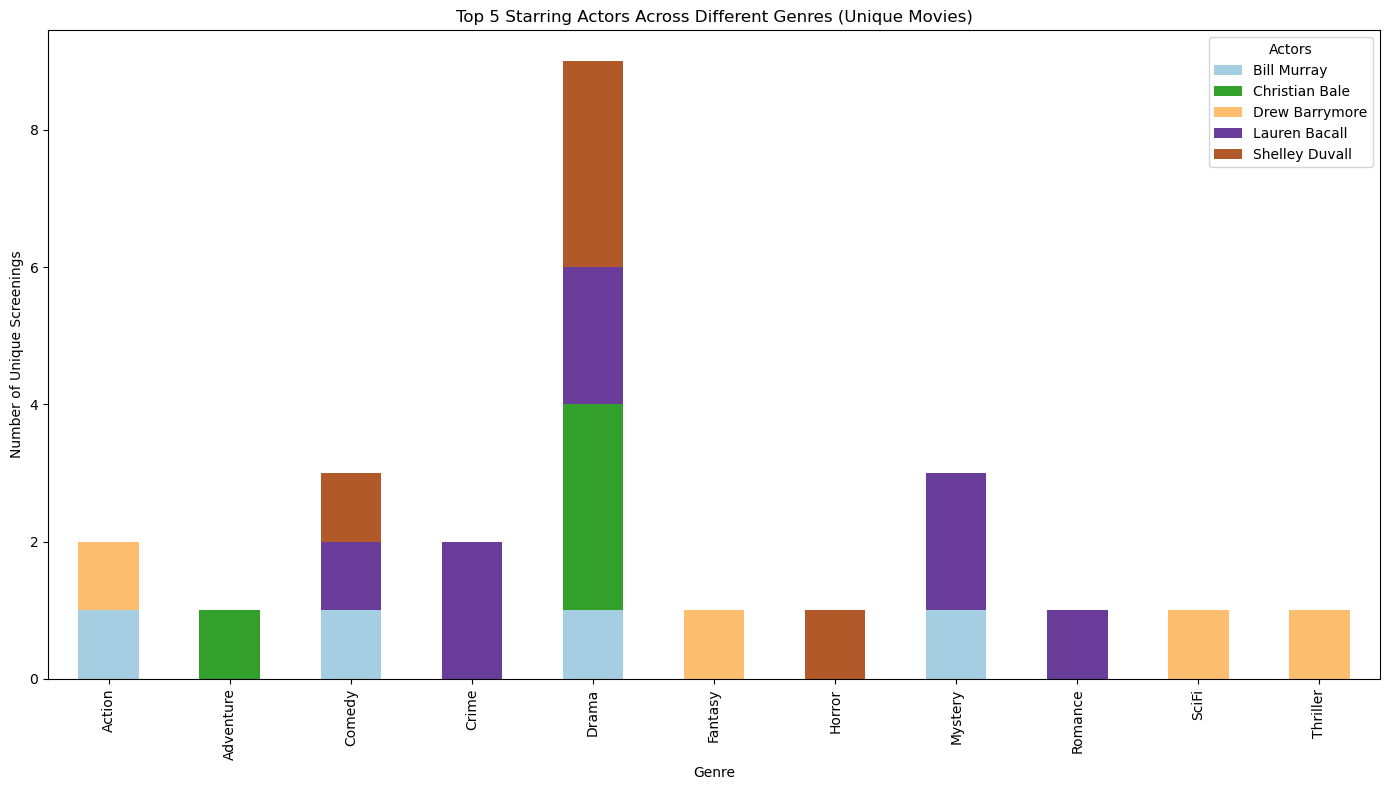

<Figure size 1600x900 with 0 Axes>

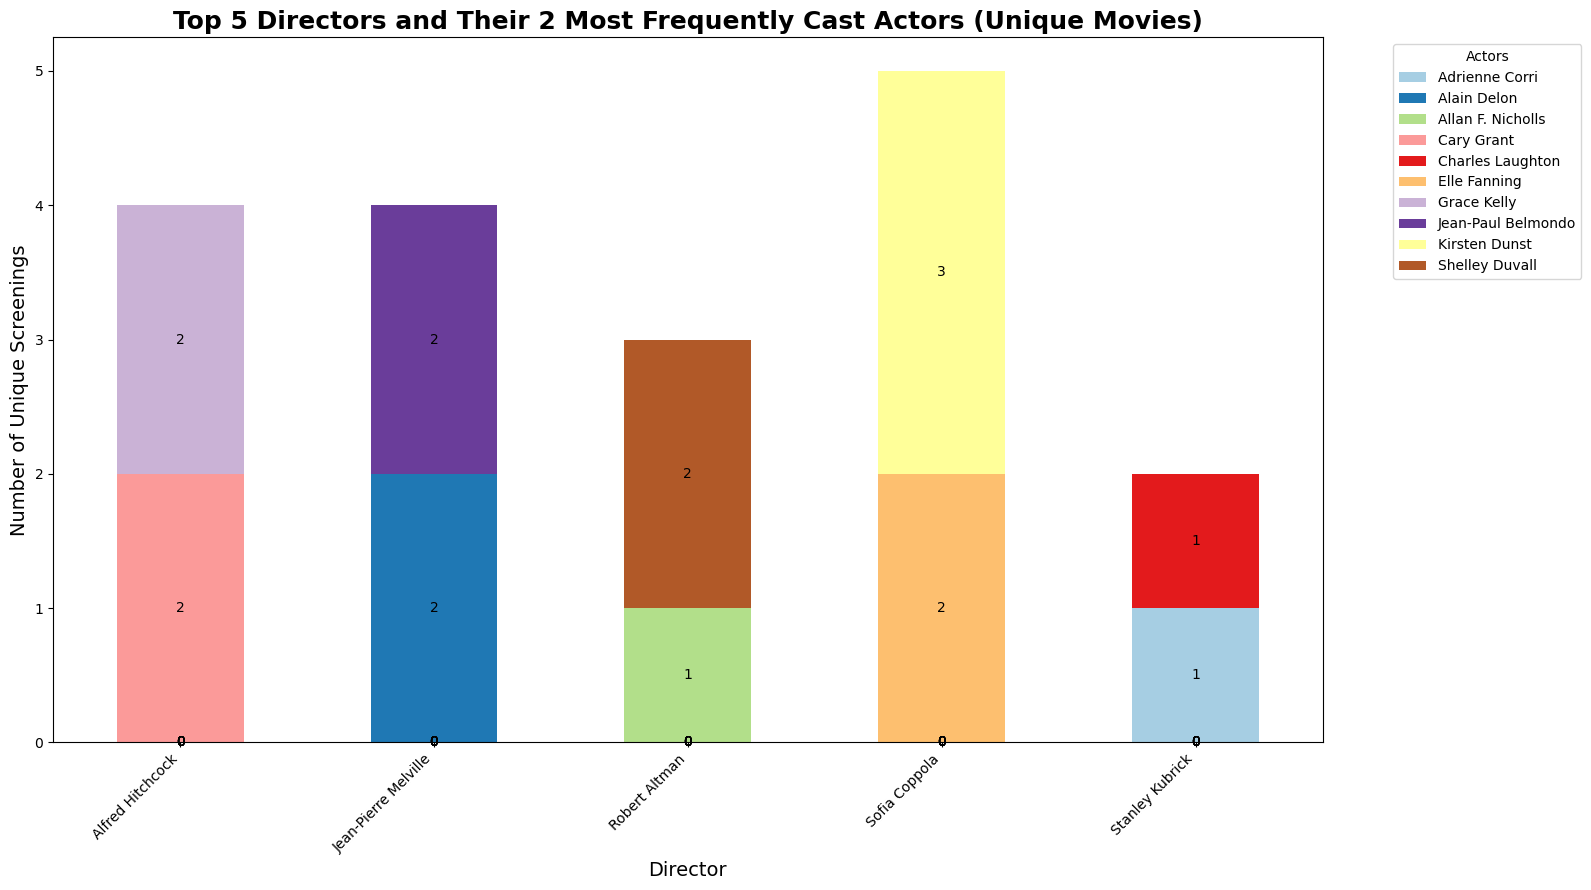

In [84]:
# 1. Which actors are most frequently cast in starring roles, and how does this change across different genres?
exploded_df = df.explode('starring')
top_actors = exploded_df.groupby('starring')['title'].nunique().nlargest(5).index
top_actors_df = exploded_df[exploded_df['starring'].isin(top_actors)]
genre_actor_count = pd.pivot_table(top_actors_df, index='genre', columns='starring', 
                                   values='title', aggfunc='nunique', fill_value=0)
ax = genre_actor_count.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Paired')
plt.title('Top 5 Starring Actors Across Different Genres (Unique Movies)')
plt.xlabel('Genre')
plt.ylabel('Number of Unique Screenings')
plt.legend(title="Actors")

plt.tight_layout()
plt.show()



# 2. Do some directors often choose the same actors? If so, which actors are most frequently cast by these directors?
top_directors = df.groupby('directors')['title'].nunique().nlargest(5).index
top_directors_df = df[df['directors'].isin(top_directors)]
exploded_df = top_directors_df.explode('starring')
director_actor_count = pd.pivot_table(exploded_df, index='directors', columns='starring', 
                                      values='title', aggfunc='nunique', fill_value=0)
top_actors_per_director = director_actor_count.apply(lambda x: x.nlargest(2), axis=1)

plt.figure(figsize=(16, 9))
ax = top_actors_per_director.plot(kind='bar', stacked=True, figsize=(16, 9), colormap='Paired')

ax.set_title('Top 5 Directors and Their 2 Most Frequently Cast Actors (Unique Movies)', fontsize=18, weight='bold')
ax.set_xlabel('Director', fontsize=14)
ax.set_ylabel('Number of Unique Screenings', fontsize=14)
ax.legend(title="Actors", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(False)

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





In the first plot, Shelley Duvall and Christian Baleare predominantly cast in dramas, while other actors, such as Lauren Bacall, are more evenly distributed across various genres. In the second plot, it’s evident that certain directors, particularly Hitchcock, Melville, and Coppola, frequently cast the same actors in multiple films.

<div class="alert alert-info" style="color: #4a4a4a; background-color: #fbe8ff; border-color: #eed4db; border-width: 1px; border-radius: 3px; padding: 10px;">

**Wrap-up**

* Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.

* How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

</div>

*your answer here*



In [85]:
hours_spent_on_hw = 11

In [86]:
grader.check("wrapup")

wrapup results: All test cases passed!

In [87]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

It took 113.06 minutes for this notebook to run


🌈 **This concludes HW1. Thank you!**